# Import Data

In [1]:
import pandas as pd
import numpy as np 
import statsmodels.formula.api as smf 

In [2]:
# Mengambil data melalui URL
url = 'https://docs.google.com/spreadsheets/d/1f_CPnJ0H0KQoCPDXejASFKMCS0hz3iLW/edit?usp=sharing&ouid=103893180789515944577&rtpof=true&sd=truehttps://docs.google.com/spreadsheets/d/1f_CPnJ0H0KQoCPDXejASFKMCS0hz3iLW/edit?usp=sharing&ouid=103893180789515944577&rtpof=true&sd=true'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_excel(url)
df

,Judul Konten,Topik,Source,Collab/Single,Produce,Jenis Konten,Jumlah Konten,Tanggal Upload,Reach,Plays,...,35-44,Others Age,Woman,Men,Others Gender,East Java,West Java,Central Java,Bali Nusra,Others
0,Beda Zaman Beda Juga Cara Berjuangnya,Entertainment,Circle,collab,NaN,Feed IG,1,2024-06-01 00:00:00,789,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Berapa jumlah kartu perdana 6 GB,Entertainment,Circle,Single,NaN,Feed IG,1,2024-06-01 00:00:00,435,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pemenang Giveaway tim3,Entertainment,Region,Single,NaN,Feed IG,1,2024-06-01 00:00:00,361,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Giveaway Tim3,Entertainment,Region,Single,NaN,Story IG,1,2024-06-01 00:00:00,112,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Repost Story Pemenang,Entertainment,Region,Single,NaN,Story IG,1,2024-06-01 00:00:00,77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Story 27 Nov,Entertainment,Region,Single,Organik,Story IG,1,"Wednesday, November 27, 2024",116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,Story 27 Nov [2],Entertainment,Region,Single,Organik,Story IG,1,"Wednesday, November 27, 2024",104,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,Kontribusi waktu meeting,Entertainment,Region,Single,Organik,Reels IG,1,"Thursday, November 28, 2024",204,247.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,Story 28 Nov,Entertainment,Region,Single,Organik,Story IG,1,"Thursday, November 28, 2024",148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Judul Konten        650 non-null    object 
 1   Topik               650 non-null    object 
 2   Source              650 non-null    object 
 3   Collab/Single       643 non-null    object 
 4   Produce             574 non-null    object 
 5   Jenis Konten        650 non-null    object 
 6   Jumlah Konten       650 non-null    int64  
 7   Tanggal Upload      650 non-null    object 
 8   Reach               650 non-null    int64  
 9   Plays               128 non-null    float64
 10  Impression          547 non-null    float64
 11  Engagement          632 non-null    float64
 12  Like                631 non-null    float64
 13  Share               231 non-null    float64
 14  Comment             268 non-null    float64
 15  Save                183 non-null    float64
 16  Replays 

In [4]:
df.columns

Index(['Judul Konten', 'Topik', 'Source', 'Collab/Single', 'Produce',
       'Jenis Konten', 'Jumlah Konten', 'Tanggal Upload', 'Reach', 'Plays',
       'Impression', 'Engagement', 'Like', 'Share', 'Comment', 'Save',
       'Replays', 'Profile Visits', 'Follows', 'External Link Taps', 'Note',
       '18-24', '25-34', '35-44', 'Others Age', 'Woman', 'Men',
       'Others Gender', 'East Java', 'West Java', 'Central Java', 'Bali Nusra',
       'Others'],
      dtype='object')

# Data Preprocessing

## Mengambil Kolom yang Digunakan

In [5]:
data = df[['Topik', 'Source', 'Jenis Konten', 'Engagement', 'Note']]
data

,Topik,Source,Jenis Konten,Engagement,Note
0,Entertainment,Circle,Feed IG,72.0,Routine
1,Entertainment,Circle,Feed IG,70.0,Routine
2,Entertainment,Region,Feed IG,39.0,Routine
3,Entertainment,Region,Story IG,6.0,Routine
4,Entertainment,Region,Story IG,4.0,Routine
...,...,...,...,...,...
645,Entertainment,Region,Story IG,4.0,Routine
646,Entertainment,Region,Story IG,5.0,Routine
647,Entertainment,Region,Reels IG,6.0,Routine
648,Entertainment,Region,Story IG,3.0,Routine


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Topik         650 non-null    object 
 1   Source        650 non-null    object 
 2   Jenis Konten  650 non-null    object 
 3   Engagement    632 non-null    float64
 4   Note          650 non-null    object 
dtypes: float64(1), object(4)
memory usage: 25.5+ KB


## Missing Value Handling

In [7]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 0 to 649
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Topik         632 non-null    object 
 1   Source        632 non-null    object 
 2   Jenis Konten  632 non-null    object 
 3   Engagement    632 non-null    float64
 4   Note          632 non-null    object 
dtypes: float64(1), object(4)
memory usage: 29.6+ KB


C:\Users\DEANNISA\AppData\Local\Temp\ipykernel_33024\697753165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [8]:
data

,Topik,Source,Jenis Konten,Engagement,Note
0,Entertainment,Circle,Feed IG,72.0,Routine
1,Entertainment,Circle,Feed IG,70.0,Routine
2,Entertainment,Region,Feed IG,39.0,Routine
3,Entertainment,Region,Story IG,6.0,Routine
4,Entertainment,Region,Story IG,4.0,Routine
...,...,...,...,...,...
645,Entertainment,Region,Story IG,4.0,Routine
646,Entertainment,Region,Story IG,5.0,Routine
647,Entertainment,Region,Reels IG,6.0,Routine
648,Entertainment,Region,Story IG,3.0,Routine


## Mengubah Data ke Dalam Bentuk Integer

In [9]:
data['Engagement'] = data['Engagement'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 0 to 649
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Topik         632 non-null    object
 1   Source        632 non-null    object
 2   Jenis Konten  632 non-null    object
 3   Engagement    632 non-null    int32 
 4   Note          632 non-null    object
dtypes: int32(1), object(4)
memory usage: 27.2+ KB


C:\Users\DEANNISA\AppData\Local\Temp\ipykernel_33024\2018784041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Engagement'] = data['Engagement'].astype(int)


## Mengubah ke Dalam Variabel Dummy

In [10]:
# Mengubah kolom kategori menjadi dummy variables
df_dummies = pd.get_dummies(data, columns=['Topik', 'Source', 'Jenis Konten', 'Note'], drop_first=True)
df_dummies = df_dummies.astype(int)
df_dummies

,Engagement,Topik_Entertainment,Topik_Rekomendasi,Topik_Selling,Source_Region,Jenis Konten_Reels IG,Jenis Konten_Story IG,Note_Routine
0,72,1,0,0,0,0,0,1
1,70,1,0,0,0,0,0,1
2,39,1,0,0,1,0,0,1
3,6,1,0,0,1,0,1,1
4,4,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...
645,4,1,0,0,1,0,1,1
646,5,1,0,0,1,0,1,1
647,6,1,0,0,1,1,0,1
648,3,1,0,0,1,0,1,1


In [11]:
df_dummies.columns

Index(['Engagement', 'Topik_Entertainment', 'Topik_Rekomendasi',
       'Topik_Selling', 'Source_Region', 'Jenis Konten_Reels IG',
       'Jenis Konten_Story IG', 'Note_Routine'],
      dtype='object')

In [12]:
#Mengganti nama variabel 
df_dummies.rename(columns={'Engagement' : 'y', 'Topik_Entertainment' : 'x1', 'Topik_Rekomendasi' : 'x2', 'Topik_Selling' : 'x3', 
                           'Source_Region' : 'x4', 'Jenis Konten_Reels IG' : 'x5', 'Jenis Konten_Story IG' : 'x6', 'Note_Routine' : 'x7'}, inplace=True) 
df_dummies.head()

,y,x1,x2,x3,x4,x5,x6,x7
0,72,1,0,0,0,0,0,1
1,70,1,0,0,0,0,0,1
2,39,1,0,0,1,0,0,1
3,6,1,0,0,1,0,1,1
4,4,1,0,0,1,0,1,1


# Random Forest Regressor

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Pisahkan fitur (X) dan target (y)
X = df_dummies.drop(columns=['y'])
y = df_dummies['y']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 30.8186177125687


In [14]:
# Menampilkan feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

  Feature  Importance
3      x4    0.345132
6      x7    0.188486
4      x5    0.179744
0      x1    0.176455
2      x3    0.106537
5      x6    0.003642
1      x2    0.000003


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df_dummies.drop(columns=['y'])
y = df_dummies['y']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Ambil fitur yang paling penting
importances = model.feature_importances_

# Urutkan fitur berdasarkan pentingnya
indices = importances.argsort()[::-1]  # Indeks urut dari yang paling penting
top_features = X.columns[indices][:5]  # Ambil 10 fitur teratas

print("Top 10 Important Features:", top_features)

# Latih model lagi dengan fitur yang terpilih
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
model.fit(X_train_selected, y_train)

# Evaluasi model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_selected)
print('Accuracy:', accuracy_score(y_test, y_pred))

Top 10 Important Features: Index(['x6', 'x4', 'x5', 'x1', 'x7'], dtype='object')
Accuracy: 0.09448818897637795


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model Regresi:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Evaluasi Model Regresi:
Mean Absolute Error (MAE): 30.3145325969123
Mean Squared Error (MSE): 11913.075609048561
Root Mean Squared Error (RMSE): 109.14703664803989
R-squared (R²): -3.02268284554423


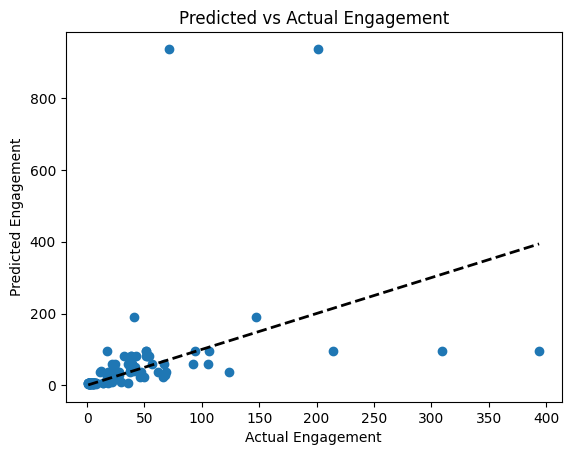

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Engagement")
plt.ylabel("Predicted Engagement")
plt.title("Predicted vs Actual Engagement")
plt.show()

# Decision Tree

In [59]:
from sklearn.model_selection import train_test_split

y = df_dummies['y']
X = df_dummies.drop(columns=['y'])

# Membagi dataset menjadi data latih (train) dan uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [60]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Prediksi data uji
y_pred = regressor.predict(X_test)

# Menampilkan hasil prediksi
print("Hasil prediksi:", y_pred)
print("Data aktual:", y_test.values)

Hasil prediksi: [  6.53454545 110.1875     854.21428571   3.17647059   6.53454545
   6.53454545   3.17647059 186.41666667   6.53454545   3.17647059
   6.53454545   4.          31.92307692  65.75        37.74074074
  40.          59.30769231  34.           6.53454545   6.53454545
   3.17647059   6.53454545  50.5          6.53454545   6.53454545
   6.53454545  46.4          6.53454545   6.53454545   6.53454545
   6.53454545  37.74074074]
Data aktual: [  4 106  71   3   5   1   5  41   7   5   5   6  26  52  18  25  39  27
   4   4   3   6  42   5   7   5  40   4   4   2  14  47]


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 33.82844158445721
RMSE: 141.00612186942763
R-squared: -33.944299709369986


# Regresi Linear

In [15]:
# Menyimpan variabel target (y)
y = df_dummies['y']

# Menghapus kolom target dari dummy variables
df_features = df_dummies.drop(columns=['y'])

# Menambahkan korelasi semua variabel terhadap y
correlations = df_features.corrwith(y)

# Menampilkan hasil korelasi
print("Korelasi antara setiap variabel dengan y:")
print(correlations)

Korelasi antara setiap variabel dengan y:
x1   -0.031760
x2   -0.005462
x3    0.029283
x4   -0.122357
x5   -0.010992
x6   -0.135554
x7   -0.221310
dtype: float64


In [17]:
# Menyiapkan formula regresi linier berganda
# Gunakan semua variabel dummy sebagai prediktor (kecuali kolom 'y')
formula = 'y ~ ' + ' + '.join(df_dummies.columns.difference(['y']))

# Membuat dan melatih model regresi linier
model = smf.ols(formula=formula, data=df_dummies).fit()

# Menampilkan ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     8.991
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.38e-10
Time:                        21:06:00   Log-Likelihood:                -4902.0
No. Observations:                 632   AIC:                             9820.
Df Residuals:                     624   BIC:                             9856.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    637.8725    109.753      5.812      0.0

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df_features

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 110.91215708760447
